In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

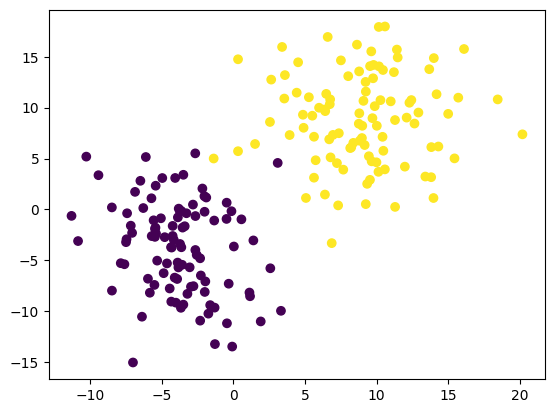

In [2]:
# Generate random data
np.random.seed(124)
X0 = np.random.multivariate_normal([-4,-4], [[10,0], [0,20]], size=100)
y0 = np.zeros(len(X0))
X1 = np.random.multivariate_normal([9,9], [[15,0], [0,20]], size=100)
y1 = np.ones(len(X1))
X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((y0, y1), axis=0)
plt.scatter(X[:, 0], X[:, 1], c=y);

In [3]:
# weights and biases
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
w = torch.zeros((X.shape[1]), device=device)
b = torch.zeros(1, device=device)

# Shuffle the data
np.random.seed(123)
idxs = np.arange(0, len(X), 1)
np.random.shuffle(idxs)
X = X[idxs]
y = y[idxs]

# Normalize the features to zero mean and unit variance
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-9)

In [4]:
# Convert the dataset to pytorch tensor
X = torch.tensor(X, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device)

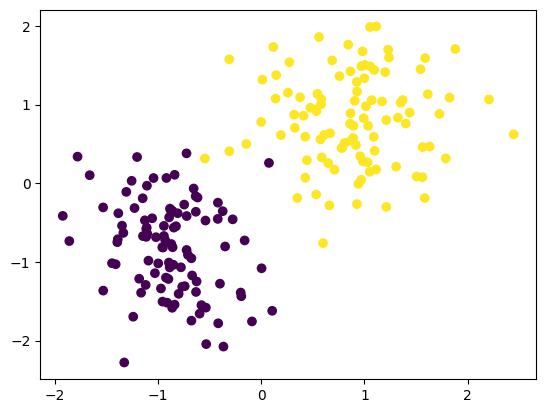

In [5]:
# Plot the normalized data
plt.scatter(X[:, 0], X[:, 1], c=y);

In [6]:
# Split the data between train and test set
n = int(0.7 * len(X))
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]
print(f"Train dataset size is {X_train.shape}")
print(f"Test dataset size is {X_test.shape}")

Train dataset size is torch.Size([140, 2])
Test dataset size is torch.Size([60, 2])


In [7]:
# Training
n_epochs = 6
for epoch in range(n_epochs):
    avg_err = 0.0
    for i in range(X_train.shape[0]):
        pred = X_train[i].dot(w) + b
        pred = torch.where(pred > 0, 1.0, 0.0)
        err = y_train[i] - pred
        w = w + err * X_train[i]
        b += err
        avg_err += err
        #print(err[0], w)
        #break
    #break
    print(f"Epoch: {epoch}, avg_error: {avg_err/X_train.shape[0]}")

Epoch: 0, avg_error: tensor([0.0071])
Epoch: 1, avg_error: tensor([-0.0071])
Epoch: 2, avg_error: tensor([0.])
Epoch: 3, avg_error: tensor([0.0071])
Epoch: 4, avg_error: tensor([0.])
Epoch: 5, avg_error: tensor([0.])


In [8]:
# Model weight params
print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: tensor([1.6194, 1.5374])
Bias: tensor([1.])


In [9]:
# Evaluation
def eval(X, y, w, b):
    y_pred = X @ w + b
    y_pred = torch.where(y_pred > 0, 1.0, 0.0)
    # accuracy
    acc = torch.sum(y_pred == y) / len(y) * 100.0
    print(f"Correct preds={torch.sum(y_pred == y)}")
    print(f"Accuracy of the model is {acc:.2f}%")

eval(X_train, y_train, w, b)
eval(X_test, y_test, w, b)
y_pred_train = torch.where(X_train @ w + b > 0)
y_pred_test = torch.where(X_test @ w + b > 0)

Correct preds=138
Accuracy of the model is 98.57%
Correct preds=60
Accuracy of the model is 100.00%


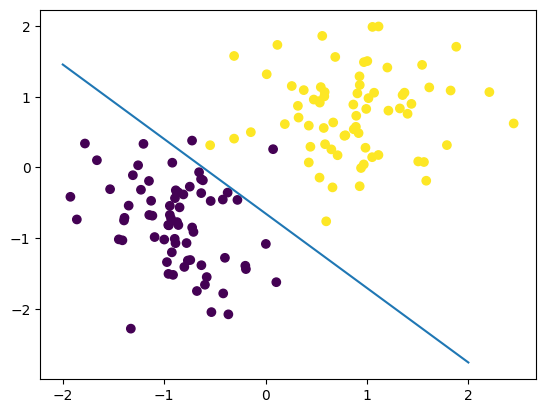

In [10]:
# Plot predictions on train dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
# Draw the decision boundary
# x0*w0 + x1*w1 + b = 0 is the decision boundary
x0_min = -2
x0_max = 2
x1_min = (-(x0_min * w[0]) - b[0]) / w[1]
x1_max = (-(x0_max * w[0]) - b[0]) / w[1]
plt.plot([x0_min, x0_max], [x1_min, x1_max])

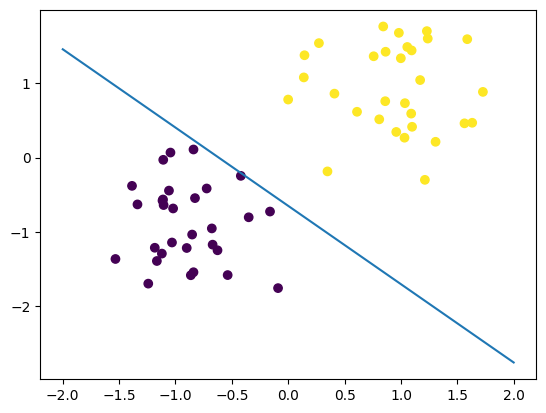

In [11]:
# Plot predictions on test dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
# Draw the decision boundary
# x0*w0 + x1*w1 + b = 0 is the decision boundary
x0_min = -2
x0_max = 2
x1_min = (-(x0_min * w[0]) - b[0]) / w[1]
x1_max = (-(x0_max * w[0]) - b[0]) / w[1]
plt.plot([x0_min, x0_max], [x1_min, x1_max])